In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rounddf=pd.read_csv("Dades/Climate game/round.csv")
sessiondf=pd.read_csv("Dades/Climate game/session.csv")
userdf=pd.read_csv("Dades/Climate game/user.csv")
userrounddf=pd.read_csv("Dades/Climate game/userround.csv")
qadf=pd.read_excel("Dades/Climate game/QuestionsAnswers.xlsx")
#rounddf
#sessiondf
#userdf
#userrounddf
qadf

,en-US,ca,es
titol_pagina,| Questions,| Enquesta,| Encuesta
titol,Enter the following data,Introdueix les dades següents,Introduce los siguientes datos
pr1,Gender,Gènere,Género
pr1_r1,Male,Home,Hombre
pr1_r2,Female,Dona,Mujer
pr2,Age,Rang d'edat,Rango de edad
pr2_r1,0 - 10,0 - 10,0 - 10
pr2_r2,11 - 15,11 - 15,11 - 15
pr2_r3,16 - 18,16 - 18,16 - 18
pr2_r4,19 - 25,19 - 25,19 - 25


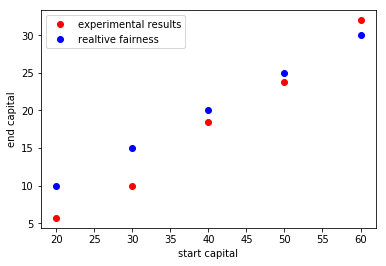

In [49]:
# mean end capital as a function of start capital
scvector=[20.0,30.0,40.0,50.0,60.0]
sumvector=[0.0,0.0,0.0,0.0,0.0]
counter=[0,0,0,0,0]
for i in range(len(userdf)):
    for k in range(5):
        if (userdf.loc[i,"start_capital"]==scvector[k]):
            sumvector[k]=sumvector[k]+userdf.loc[i,"end_capital"]
            counter[k]=counter[k]+1
for k in range(5):
    sumvector[k]=sumvector[k]/float(counter[k])
plt.plot(scvector,sumvector,"ro",label="experimental results")
fairvector=list(range(5))
for i in range(5):
    fairvector[i]=0.5*scvector[i]
plt.plot(scvector,fairvector,"bo",label="realtive fairness")
plt.xlabel("start capital")
plt.ylabel("mean end capital")
plt.legend()

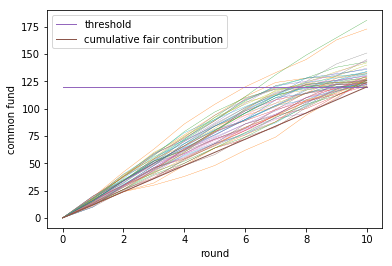

In [44]:
# evolution of funds through the rounds
roundi=list(range(0,11))
roundlist=(0,1,2,3,4,5,6,7,8,9,10)
for i in range(1,55):
    roundi=rounddf.loc[rounddf["session_id"]==i]
    roundi=roundi[["end_pot"]]
    roundi.index=roundi.index%10
    roundi.loc[-1] = [120]
    roundi.index = roundi.index + 1
    roundi.sort_index(inplace=True)
    for j in range (0,11):
        roundi.loc[j]=120-roundi.loc[j]
    plt.plot(roundlist,roundi,lw=0.3)
plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
plt.xlabel("round")
plt.ylabel("common fund")
plt.legend()

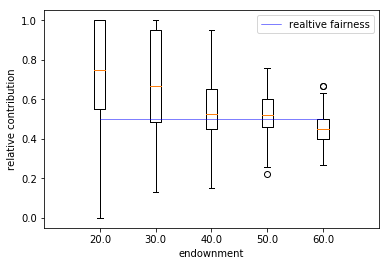

In [83]:
# relative contributions as a function of start capital with boxplot
scvect=[20.0,30.0,40.0,50.0,60.0]
data=[[],[],[],[],[]]
for k in range(5):
    for i in range(len(userdf)):
        if (userdf.loc[i,"start_capital"]==scvect[k]):
            data[k].append(1-userdf.loc[i,"winnings"]/scvect[k])
plt.boxplot(data,positions=scvect,widths=2)
fairvector=(0.5,0.5,0.5,0.5,0.5)
plt.plot(scvect,fairvector,"b-",lw=0.5,label="realtive fairness")
plt.xlabel("endownment")
plt.ylabel("relative contribution")
plt.xlim([10.0,70.0])
plt.legend()

Text(0,0.5,'mean time (s)')

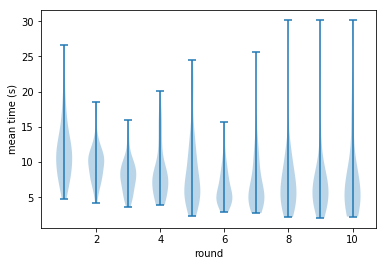

In [69]:
# mean time for each round with violinplot
t1=rounddf["start_time"]
t2=rounddf["end_time"]
mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
timebyround=[[],[],[],[],[],[],[],[],[],[]]
for k in range(540):
    timebyround[k%10].append(rounddf.loc[k,"time"])
plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
plt.xlabel("round")
plt.ylabel("mean time (s)")

([<matplotlib.axis.XTick at 0x1ceec1b5dd8>,
 <a list of 5 Text xticklabel objects>)

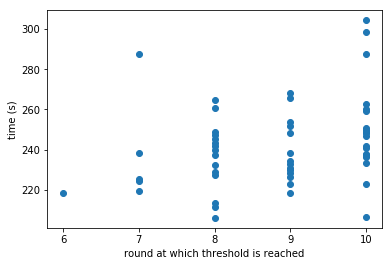

In [74]:
# correlation between time and round with threshold achieved
t1=sessiondf["start_date"]
t2=sessiondf["end_date"]
mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
sessiondf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
counter=0
thresholdround=[]
for k in range(len(rounddf)):
    pot1=rounddf.loc[k,"start_pot"]
    pot2=rounddf.loc[k,"end_pot"]
    if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
        thresholdround.append(rounddf.loc[k,"num_round"])
        counter=counter+1
thresholdround=pd.DataFrame(thresholdround)
plt.scatter(thresholdround,sessiondf["time"])
plt.xlabel("round at which threshold is reached")
plt.ylabel("time (s)")
plt.xticks([6,7,8,9,10])

Text(0,0.5,'relative contribution')

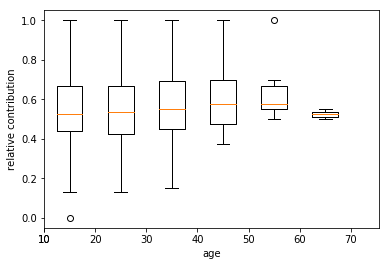

In [128]:
# relative contribution dependence on age
data=[[],[],[],[],[],[],[]]
for k in range(7):
    for i in range(len(userdf)):
        if (userdf.loc[i,"age"]>=10*(k+1) and userdf.loc[i,"age"]>10*(k+2)):
            data[k].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
plt.boxplot(data,positions=[15,25,35,45,55,65,75],widths=5)
plt.xticks([10,10,20,30,40,50,60,70],[10,10,20,30,40,50,60,70])
plt.xlabel("age")
plt.ylabel("relative contribution")

Text(0,0.5,'relative contribution')

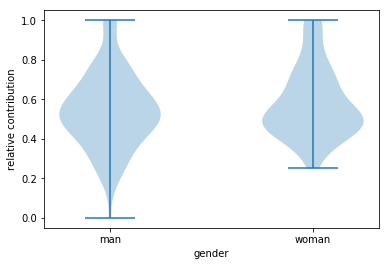

In [126]:
# relative contribution dependence on gender
data=[[],[]]
for i in range(len(userdf)):
    if (userdf.loc[i,"gender"]=="h"):
        data[0].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
    if (userdf.loc[i,"gender"]=="d"):
        data[1].append(1-userdf.loc[i,"winnings"]/userdf.loc[i,"start_capital"])
plt.violinplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("relative contribution")